/tmp/ipykernel_133/3049687290.py:18: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, -1] = data.iloc[:, -1].map({'cp': 0, 'im': 1}).astype(int)


Epoch [1], Loss: 0.6757, Validation Accuracy: 59.09%
Epoch [2], Loss: 0.6468, Validation Accuracy: 59.09%
Epoch [3], Loss: 0.6305, Validation Accuracy: 59.09%
Epoch [4], Loss: 0.6263, Validation Accuracy: 59.09%
Epoch [5], Loss: 0.6250, Validation Accuracy: 59.09%
Epoch [6], Loss: 0.6189, Validation Accuracy: 59.09%
Epoch [7], Loss: 0.6085, Validation Accuracy: 59.09%
Epoch [8], Loss: 0.5980, Validation Accuracy: 59.09%
Epoch [9], Loss: 0.5906, Validation Accuracy: 59.09%
Epoch [10], Loss: 0.5862, Validation Accuracy: 59.09%
Epoch [11], Loss: 0.5823, Validation Accuracy: 59.09%
Epoch [12], Loss: 0.5769, Validation Accuracy: 59.09%
Epoch [13], Loss: 0.5692, Validation Accuracy: 59.09%
Epoch [14], Loss: 0.5595, Validation Accuracy: 59.09%
Epoch [15], Loss: 0.5483, Validation Accuracy: 59.09%
Epoch [16], Loss: 0.5367, Validation Accuracy: 59.09%
Epoch [17], Loss: 0.5255, Validation Accuracy: 59.09%
Epoch [18], Loss: 0.5150, Validation Accuracy: 59.09%
Epoch [19], Loss: 0.5043, Validation 

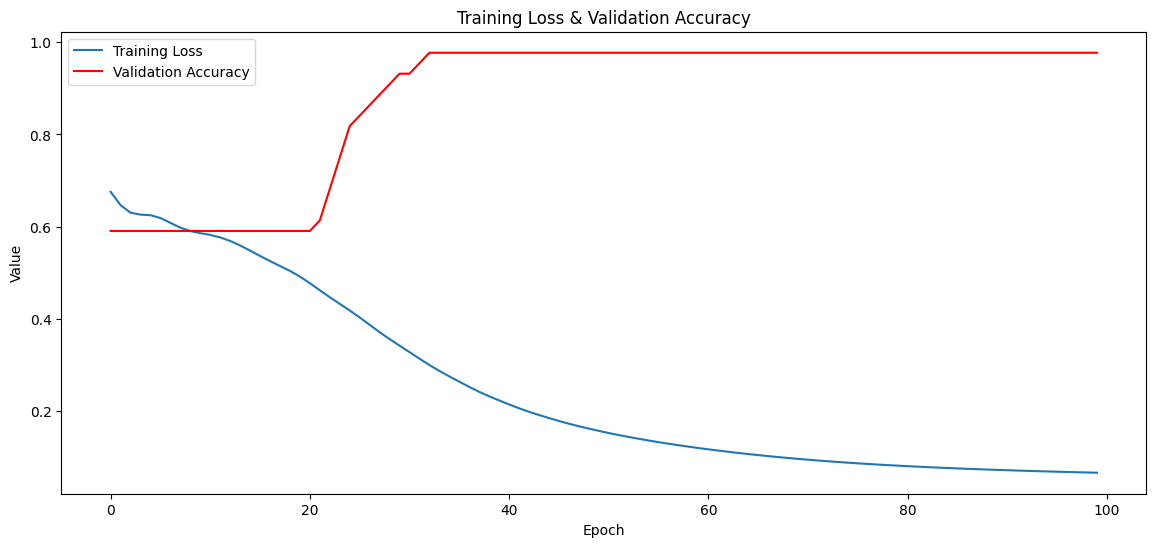

In [59]:
import math
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

rng = np.random.RandomState(0)



# Read the ecoli.data file
data = pd.read_csv("ecoli.data", sep="\s+", header=None)

# Convert the last column into a binary classifier based on 'cp' and 'im' labels
data.iloc[:, -1] = data.iloc[:, -1].map({'cp': 0, 'im': 1}).astype(int)
data.drop(columns=data.columns[0], inplace=True)
#print(data)

# Split the data into features (X) and labels (Y)
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, random_state=rng)

# Convert them to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train.astype(float), dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(X_val, dtype=torch.float32)
Y_val = torch.tensor(Y_val.astype(float), dtype=torch.float32).view(-1, 1)



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 2)  # 7 input features in the ecoli.data
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()
#print(model)

#criterion = nn.MSELoss()
criterion = nn.BCELoss()

#optimizer = optim.Adadelta(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.1)
#optimizer = optim.SGD(model.parameters(), lr =0.01)
# Training loop
allloss = []
validation_accuracies = []  # Store validation accuracies for each epoch

for epoch in range(100):  # Increased epochs for better training
    optimizer.zero_grad()  # Clearing previous gradients
    outputs = model(X_train)  # Use X_train
    loss = criterion(outputs, Y_train)  # Use Y_train
    loss.backward()
    optimizer.step()
    allloss.append(loss.item())
    
    # Evaluate on validation set
    with torch.no_grad():
        val_predictions = model(X_val)
        val_predicted_classes = (val_predictions > 0.5).float()
        val_correct_predictions = (val_predicted_classes == Y_val).float().sum()
        val_accuracy = val_correct_predictions / Y_val.size(0)
        validation_accuracies.append(val_accuracy.item())
    
    print(f"Epoch [{epoch + 1}], Loss: {loss.item():.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plotting the loss
plt.figure(figsize=(14, 6))
plt.plot(allloss, label="Training Loss")
plt.plot(validation_accuracies, label="Validation Accuracy", color="red")
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss & Validation Accuracy')
plt.legend()
plt.savefig("Training Loss & Validation Accuracy.png")
plt.show()